<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/Cleaning_Covid_Death_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
df = pd.read_csv('COVID-19_Death_Counts.csv')
df.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/03/2024,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,10/03/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,10/03/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN
3,10/03/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN
4,10/03/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN


In [55]:
#Data initialy had two rows that were messing with the rest of the data set.
#Resolved this manually in the terminal and editing the file, and then reuploading it
#This line of code confirms that the column names are now correct
column_names = df.columns
print(column_names)

Index(['Data as of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week Ending Date', 'State', 'COVID-19 Deaths',
       'Total Deaths', 'Percent of Expected Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')


In [56]:
#Delete all rows in which the state variable is not named "United States"
df = df[df['State'] == 'United States']
df.head()

,Data as of,Start Date,End Date,Group,Year,Month,MMWR Week,Week Ending Date,State,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,10/03/2024,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,0.0,60170.0,98.0,4111.0,0.0,434.0,4545.0,NaN
1,10/03/2024,01/05/2020,01/11/2020,By Week,2020,NaN,2.0,01/11/2020,United States,1.0,60734.0,97.0,4153.0,1.0,475.0,4628.0,NaN
2,10/03/2024,01/12/2020,01/18/2020,By Week,2020,NaN,3.0,01/18/2020,United States,2.0,59362.0,98.0,4066.0,2.0,468.0,4534.0,NaN
3,10/03/2024,01/19/2020,01/25/2020,By Week,2020,NaN,4.0,01/25/2020,United States,3.0,59162.0,99.0,3915.0,0.0,500.0,4418.0,NaN
4,10/03/2024,01/26/2020,02/01/2020,By Week,2020,NaN,5.0,02/01/2020,United States,0.0,58834.0,99.0,3818.0,0.0,481.0,4299.0,NaN


In [57]:
#Ensuring that there is only one unique value, United States, within the state variable.
unique_states_count = df['State'].nunique()
print(unique_states_count)

1


In [75]:
#Taking out unnessary columns to make the data set smaller, and renaming MMWR Week to just Week for clarity
df = df[['Start Date', 'End Date', 'Group', 'Year', 'MMWR Week', 'State', 'COVID-19 Deaths' ]]
df.rename(columns={'MMWR Week': 'Week'}, inplace=True)
df.head()

,Start Date,End Date,Group,Year,Week,State,COVID-19 Deaths
0,12/29/2019,01/04/2020,By Week,2019/2020,1.0,United States,0.0
1,01/05/2020,01/11/2020,By Week,2020,2.0,United States,1.0
2,01/12/2020,01/18/2020,By Week,2020,3.0,United States,2.0
3,01/19/2020,01/25/2020,By Week,2020,4.0,United States,3.0
4,01/26/2020,02/01/2020,By Week,2020,5.0,United States,0.0


EDA; making histograms for each years weekly Covid-19 deaths.

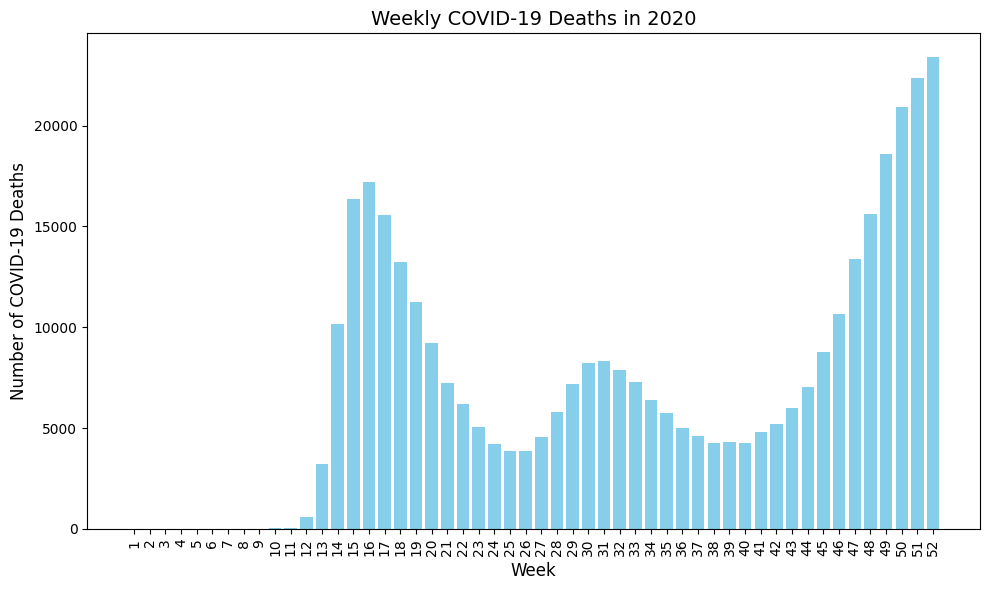

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the year 2020
df_2020 = df[(df['Year'] == '2020') | (df['Year'] == ('2019/2020'))]
weekly_deaths = df_2020.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='skyblue')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2020', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

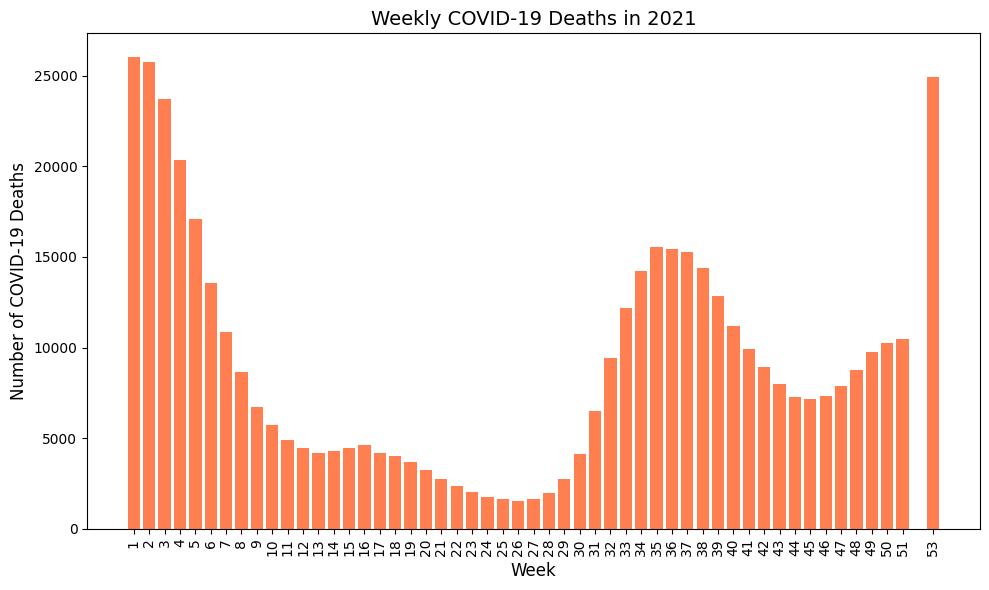

In [77]:
# Filter the data for the year 2021
df_2021 = df[(df['Year'] == '2021') | (df['Year'] == ('2020/2021'))]
weekly_deaths = df_2021.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='coral')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2021', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

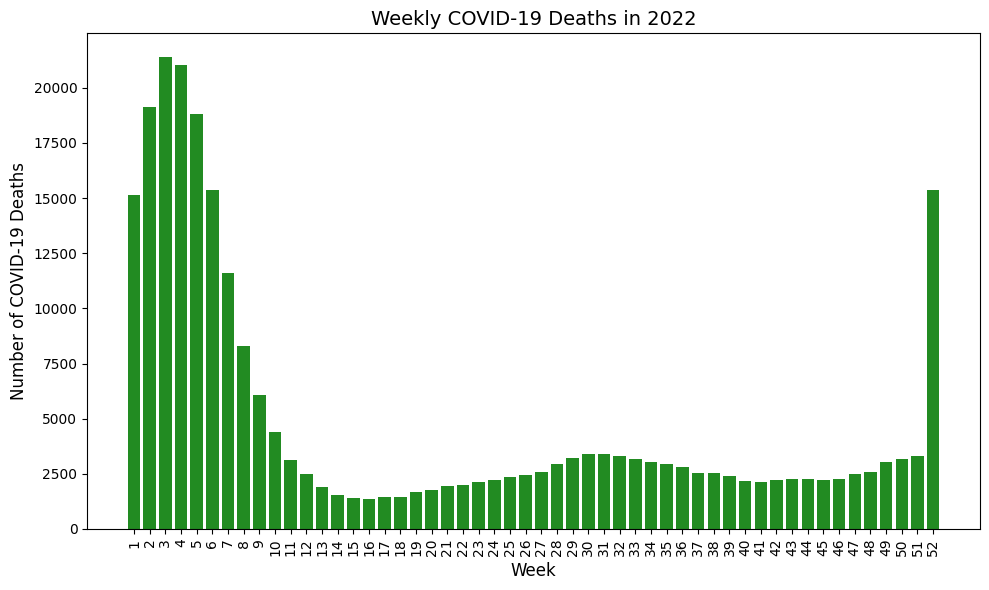

In [78]:
# Filter the data for the year 2022
df_2022 = df[(df['Year'] == '2022') | (df['Year'] == ('2021/2022'))]
weekly_deaths = df_2022.groupby('Week')['COVID-19 Deaths'].sum()

# Create a histogram for the weekly COVID-19 deaths
plt.figure(figsize=(10,6))
plt.bar(weekly_deaths.index, weekly_deaths.values, color='forestgreen')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths in 2022', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Display the plot
plt.xticks(weekly_deaths.index, rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

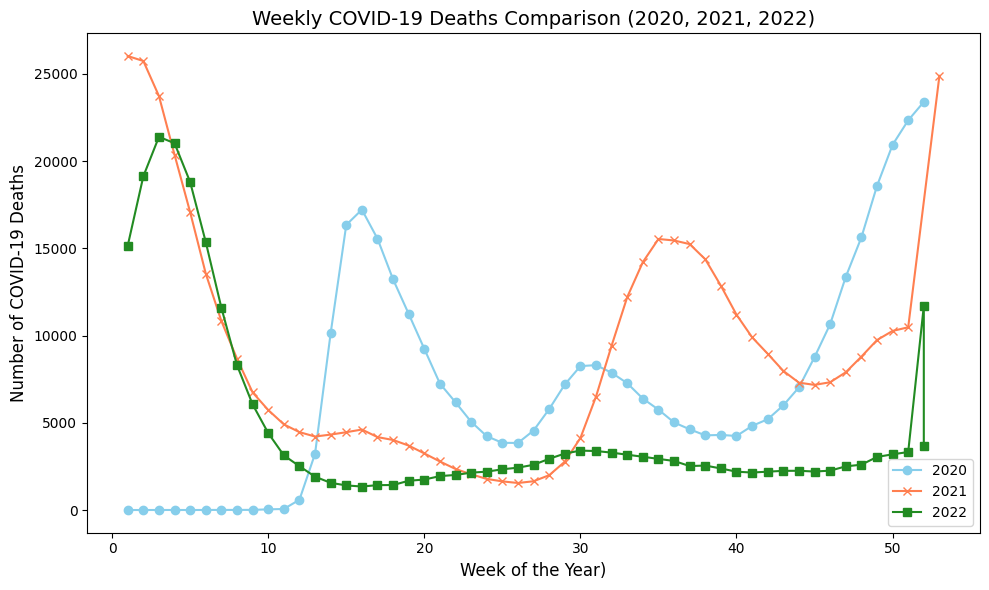

In [79]:
#line graph comparing weekly death rates accross three years; 2020, 2021, and 2022
import pandas as pd
import matplotlib.pyplot as plt

# Sort each DataFrame by 'MMWR' to ensure proper plotting
df_2020 = df_2020.sort_values('Week')
df_2021 = df_2021.sort_values('Week')
df_2022 = df_2022.sort_values('Week')

# Plotting the data for 2020, 2021, and 2022
plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(df_2020['Week'], df_2020['COVID-19 Deaths'], label='2020', color='#87CEEB', linestyle='-', marker='o')

# Plot for 2021
plt.plot(df_2021['Week'], df_2021['COVID-19 Deaths'], label='2021', color='#FF7F50', linestyle='-', marker='x')

# Plot for 2022
plt.plot(df_2022['Week'], df_2022['COVID-19 Deaths'], label='2022', color='#228B22', linestyle='-', marker='s')

# Add titles and labels
plt.title('Weekly COVID-19 Deaths Comparison (2020, 2021, 2022)', fontsize=14)
plt.xlabel('Week of the Year)', fontsize=12)
plt.ylabel('Number of COVID-19 Deaths', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
